<small><i>This notebook was put together by [Wesley Beckner](http://wesleybeckner.github.io/).</i></small>

In [23]:
import json
import os
import sys
import pandas as pd
import numpy as np
from __future__ import print_function

#rdkit modules
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator as Calculators


#scikit modules
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#plot modules and formatting
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("figure", facecolor="white")
params = {
    'lines.markersize' : 10,
    'axes.labelsize': 20,
    'font.size': 20,
    'legend.fontsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'text.usetex': False,
   }
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]   
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [24]:
#grab our checkName code
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
import salty
salty.checkName("CCCCN1C=C[N+](=C1)C,C(F)(F)(F)S(=O)(=O)[O-]")

database found
user has queried with a SMILES structure
your query has returned 1-butyl-3-methylimidazolium  trifluoromethanesulfonate


'1-butyl-3-methylimidazolium\xc2\xa0 trifluoromethanesulfonate'

In [4]:
outer_old = pd.DataFrame()
outer_new = pd.DataFrame()

for i in range(2266):
    with open("../salty/data/DENSITY/%s.json" % str(i+1)) as json_file:
        
        #grab data, data headers (names), the salt name
        json_full = json.load(json_file)
        json_data = pd.DataFrame(json_full['data'])
        json_datanames = np.array(json_full['dhead'])
        json_data.columns =  json_datanames
        json_saltname = pd.DataFrame(json_full['components'])
        print(json_saltname.iloc[0][3])
        
        inner_old = pd.DataFrame()
        inner_new = pd.DataFrame()
        
        #loop through the columns of the data, note that some of the 
        #json files are missing pressure data. 
        for indexer in range(len(json_data.columns)):
            grab=json_data.columns[indexer]
            list = json_data[grab]
            my_list = [l[0] for l in list]
            dfmy_list = pd.DataFrame(my_list)
            dfmy_list.columns = [json_datanames[indexer][0]]
            inner_new = pd.concat([dfmy_list, inner_old], axis=1)
            inner_old = inner_new
            
        #add the name of the salt    
        inner_old['salt_name']=json_saltname.iloc[0][3]           
        
        #add to the growing dataframe
        outer_new = pd.concat([inner_old, outer_old], axis=0)
        outer_old = outer_new
print(outer_old)

1-hexyl-3-methylimidazolium bis[(trifluoromethyl)sulfonyl]imide
1-butyl-3-methylimidazolium tetrafluoroborate
1-butyl-3-methylimidazolium methylsulfate
1-ethyl-3-methylimidazolium ethyl sulfate
2-hydroxy-N-methylethanaminium pentanoate
2-hydroxy-N-methylethanaminium propionate
N-methyl-2-hydroxyethylammonium acetate
2-hydroxy-N-methylethanaminium formate
2-hydroxy-N-methylethanaminium isobutyrate
N-methyl-2-hydroxyethylammonium butanoate
1-butyl-3-methylimidazolium bis(trifluoromethylsulfonyl)imide
1-ethyl-3-methylimidazolium ethyl sulfate
1-butyl-3-methylimidazolium tetrafluoroborate
1-butyl-3-methylimidazolium hexafluorophosphate
1-hexyl-3-methylimidazolium hexafluorophosphate
1-ethyl-3-methylimidazolium tetrafluoroborate
1-octyl-3-methylimidazolium hexafluorophosphate
1-hexyl-3-methylimidazolium tetrafluoroborate
tetradecyl(trihexyl)phosphonium dicyanamide
1-butyl-3-methylimidazolium bis(trifluoromethylsulfonyl)imide
1-butyl-3-methylimidazolium octyl sulfate
1-butyl-3-methylimidazol

In [9]:
pd.DataFrame.to_csv(outer_old, path_or_buf='../salty/data/density.csv')

In [25]:
salts=pd.read_csv('../salty/data/density.csv',delimiter=',')
salts = salts.reset_index() #reset the index so our for loops work
salts['salt_SMILES'] = np.nan

In [ ]:
###run salts through checkName
for a, b in enumerate(salts['salt_name']):        
    try:
        grabSMILES = salty.checkName(b)
        salts['salt_SMILES'][a] = salty.checkName(b)
    except: #note that single-atom ions return an error in pychem, if failed computations are indicated remove problem
        pass #entries in the cell above

database found
query not found
database found
query not found
database found
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C,C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
database found
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C,C(F)(F)(F)S(=O)(=O)[N-]S(=O)(=O)C(F)(F)F
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
query not found
database found
user has queried with a name
your query has returned CCN1C=C[N+](=C1)C,[B-](F)(F)(F)F
database found
user has q

In [43]:
salts=pd.read_csv('../salty/data/salts_with_smiles.csv',delimiter=',')
salts = salts.loc[salts['salt_SMILES'] != "0"]
salts = salts.loc[salts['salt_SMILES'] != "0."]

salts.shape

(3703, 10)

<a id='top'></a>
# 2D descriptor selection with LASSO and SVR

PyChem calculates 1266 descriptors for each of the IL pairs. Single atom ions cause PyChem to return an error, so those are removed from the dataset. Viscosity, cation, and anion data are appended to the pandas data frame

If not making changes to the starting dataset, load the .npy file directly [here](#direct load)

load the train/test split according to MD calcs data [here](#splitByMD)

load the scikit svr code [here](#svr load)

load generic lasso train/test sets [here](#lasso load)

load coco's lasso code [here](#coco lasso load)

load the scikit lasso code [here](#lasso scikit load)

## Algorithmic solvent search

load cation, anion pairing code [here](#mix)

If not making changes to the mixed salts, load the .npy file directly [here](#direct)

load SVR prediction [here](#svr)

load coco's prediction [here](#coco)

load scikit lasso prediction [here](#lasso)

## Other regression methods

load the choose code [here](#choose code)

load the choose 10 lasso code [here](#lasso code)

load the PCA code [here](#pca code)

load the choose results [here](#descriptor load)

[read about the descriptors](#background)

In [108]:
###READ SMILES INTO PYCHEM AND CREATE DATAFRAME
cats = pd.DataFrame(columns=salts['NAME_CAT']) #loop through all the salts
old = pd.DataFrame()
new = pd.DataFrame()
for a, b in enumerate(salts['NAME_CAT']):    
    catdes=[] #descriptors for cations
    andes=[] #descriptors for anions
    cat=PyChem2d() #create PyChem molecular instances
    an=PyChem2d()
    try:
        print(b,salts['SMILE_anion'][a]) #check that we're computing
        cat.ReadMolFromSmile(np.str(salts['SMILE_cation'][a])) #cation
        an.ReadMolFromSmile(np.str(salts['SMILE_anion'][a])) #anion
        andes.append(an.GetAllDescriptor()) 
        catdes.append(cat.GetAllDescriptor()) #add all the descriptors    
        dfan = pd.DataFrame(andes) #turn the array into a dataframe
        dfcat = pd.DataFrame(catdes)
        dfan.rename(columns=lambda x: x + 'anion', inplace=True) #rename headers (cation or anion)
        dfcat.rename(columns=lambda x: x + 'cation', inplace=True)
        df = pd.concat([dfcat, dfan], axis=1) #concatonate cationic and anionic descriptor df's
        if a != 0: #grow the dataframe
            new = pd.concat([df, old], axis=0)
        old = new
    except: #note that single-atom ions return an error in pychem, if failed computations are indicated remove problem
        pass #entries in the cell above
        print('failed ',b,salts['NAME_ANI'][a])

1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(#N)[N-]C#N
1-ethyl-3-methylimidazolium C(C(F)(F)S(=O)(=O)NS(=O)(=O)C(C(F)(F)F)(F)F)(F)(F)F
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidazolium  CC(=O)[O-]
1-butyl-3-methylimidaz

In [33]:
###Append these values in a separate step since 
###calculating the descriptors is computationally expensive

desc = new
desc=desc.reset_index()
desc.loc[:,'T'] = pd.Series(salts['T'], index=desc.index)
for a in range(len(salts['T'])):
    desc.iloc[a-1,-1] = salts['T'][a]
desc.loc[:,'P'] = pd.Series(salts['P'], index=desc.index)
for a in range(len(salts['P'])):
    desc.iloc[a-1,-1] = salts['P'][a]
desc.loc[:,'NAME_CAT'] = pd.Series(salts['NAME_CAT'], index=desc.index)
for a in range(len(salts['NAME_CAT'])):
    desc.iloc[a-1,-1] = salts['NAME_CAT'][a]
desc.loc[:,'NAME_ANI'] = pd.Series(salts['NAME_ANI'], index=desc.index)
for a in range(len(salts['NAME_ANI'])):
    desc.iloc[a-1,-1] = salts['NAME_ANI'][a]
desc.loc[:,'Viscosity'] = pd.Series(salts['Viscosity'], index=desc.index)
for a in range(len(salts['Viscosity'])):
    desc.iloc[a-1,-1] = salts['Viscosity'][a]

In [35]:
pd.DataFrame.to_csv(desc, path_or_buf='viscositydescriptors')

<a id='direct load'></a>
# Direct data load

[back to top](#top)

In [5]:
data = pd.DataFrame.from_csv('viscositydescriptors') #load data
data = data.loc[:, (data != 0).any(axis=0)] #remove columns where all values are 0
data.dropna(inplace=True) #remove empty columns and rows with NaN 
X_std = data.drop('NAME_CAT',1) #remove non-numeric columns and normalize values
X_std = X_std.drop('NAME_ANI',1)
X_std = StandardScaler().fit_transform(X_std)
n = data.shape[0]
n_train = int(n*0.8) #set fraction of data to be for training
n_test  = n - n_train

<a id='svr load'></a>

# SVR MODEL

[back to top](#top)

In [20]:
Deslist=data.columns.values[:-3] #save descriptor list for Coco's code
data=np.array(data)
#data=X_std
n = data.shape[0]
d = data.shape[1]
d -= 3

print(n,d)

data = np.random.permutation(data) #if you delete, will not be random ie separate by group
X_train = np.zeros((n_train,d)) #prepare train/test arrays
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = data[:n_train,:-3] #fill arrays according to train/test split
Y_train[:] = data[:n_train,-1].astype(float)

X_test[:] = data[n_train:,:-3]
Y_test[:] = data[n_train:,-1].astype(float)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

394 750
(315, 750)
(79, 750)
(315,)


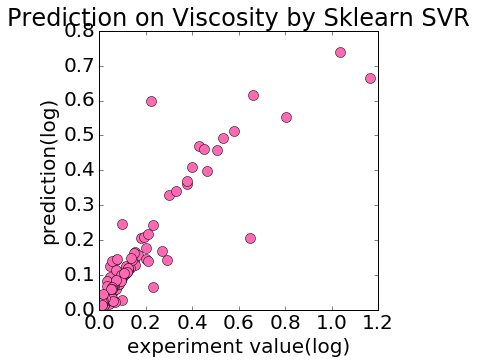

In [21]:
clf = SVR(C=1.0, epsilon=0.01,max_iter=10000)
clf.fit(X_train,Y_train)

plt.figure(figsize=(5,5))
plt.plot(Y_train,clf.predict(X_train),"o",color ='hotpink')
#plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
#plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on Viscosity by Sklearn SVR')
plt.show()

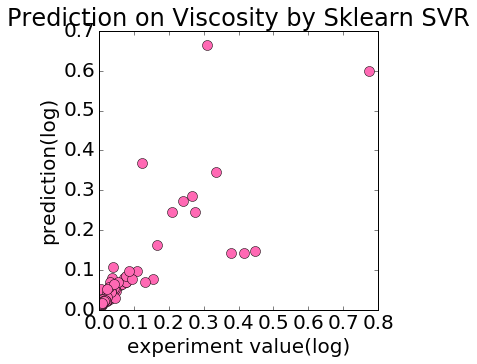

In [22]:
plt.figure(figsize=(5,5))
plt.plot(Y_test,clf.predict(X_test),"o",color ='hotpink')
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on Viscosity by Sklearn SVR')
plt.show()

<a id='lasso load'></a>

# LASSO MODEL

[back to top](#top)

a description of lasso can be found [here](http://www.moleculardescriptors.eu/tutorials/T6_moleculardescriptors_variable_selection.pdf)

In [12]:
Deslist=data.columns.values[:-3] #save descriptor list for Coco's code
data=np.array(data)
#data=X_std
n = data.shape[0]
d = data.shape[1]
d -= 3

print(n,d)

#data = np.random.permutation(data) #if you delete, will not be random ie separate by group
X_train = np.zeros((n_train,d)) #prepare train/test arrays
X_test  = np.zeros((n_test,d))
Y_train = np.zeros((n_train))
Y_test = np.zeros((n_test))

X_train[:] = data[:n_train,:-3] #fill arrays according to train/test split
Y_train[:] = np.log(data[:n_train,-1].astype(float))

X_test[:] = data[n_train:,:-3]
Y_test[:] = np.log(data[n_train:,-1].astype(float))

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

394 750
(326, 750)
(68, 750)
(326,)


##### <a id='coco lasso load'></a>

## Coco LASSO code

In [95]:
w = np.zeros(d) #array length of descriptors
w0 = w0last = 0
converged = False
yh = np.zeros(n_train) #prediction from model
rgl= 1 #regulation, bias against additional parameters
ITR = 100000 #iterations
itr = 0
while not converged: 
    yh = np.add(X_train.dot(w), w0*np.ones(n_train))
    w0last = w0
    wlast = np.copy(w)
    w0 = np.sum(np.subtract(Y_train, yh))/n_train
    yh = np.add(yh,(w0-w0last)*np.ones(n_train))
    for k in range (0,d):
        Xk = X_train[:,k]
        ak = Xk.T.dot(Xk)
        ck = Xk.T.dot(Y_train-yh+w[k]*Xk)
        if ck < (-1 * rgl):
            w[k] = (ck + rgl)/ak
        elif ck > rgl:
            w[k] = (ck - rgl)/ak
        else:
            w[k] = 0
        yh = np.add(yh,(w[k]-wlast[k])*X_train[:,k])    
    SUB = np.subtract(w, wlast)
    check = np.dot(SUB.T,SUB)
    if (check< 0.00000000001):
        converged = True;
        print("success")
        break     
    itr += 1
    if itr == ITR:
        print("failed")
        break

success


In [96]:
y_train = np.add(X_train.dot(w), w0*np.ones(n_train))
print(w0)
print(LINA.norm(Y_train-y_train))
D = int((d-2)/2)
wes = []  #make a df for my slides
for i in range(d):
    if w[i]>0 :
        if (i<D):
            print("CATION",Deslist[i],i)
            wes.append("CATION " + Deslist[i])
        if (i>=D and i<2*D):
            print("ANION",Deslist[i],i)
            wes.append("ANION " + Deslist[i])
        if (i == d-1):
            print("T")
        if (i == d):
            print("P")

2.70987165579e-05
1.21951623346
CATION Tschcation 247
ANION IDETanion 456
ANION ISIZanion 457
ANION Weightanion 591


In [97]:
forslides = pd.DataFrame(wes)
forslides.rename(index=int, columns={0:"Top Features"})

,Top Features
0,CATION Tschcation
1,ANION IDETanion
2,ANION ISIZanion
3,ANION Weightanion


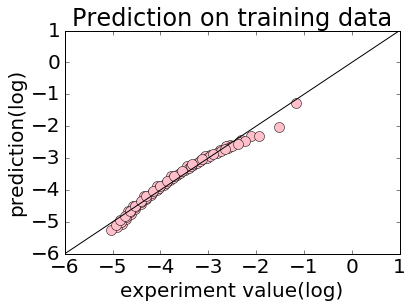

In [98]:
y_train = np.add(X_train.dot(w), w0*np.ones(n_train))
plt.plot(Y_train,y_train,"o",color ='pink')
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlabel('experiment value(log)')
plt.ylabel('prediction(log)')
plt.title('Prediction on training data')
plt.show()

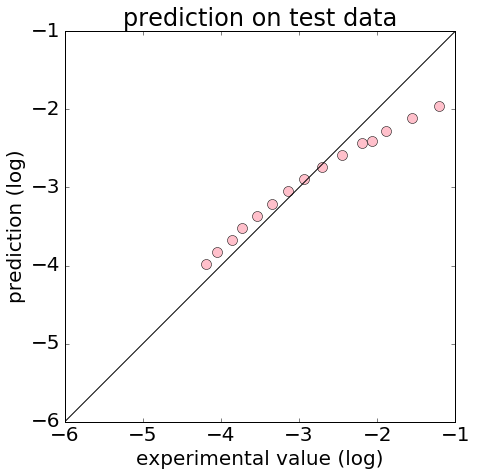

In [99]:
plt.rcParams.update(params)
y_test = np.add(X_test.dot(w), w0*np.ones(n_test))
fig=plt.figure(figsize=(7,7), dpi=300)
plt.plot(Y_test,y_test,"o",color = "pink")
plt.plot(np.arange(-6,1,0.0001),np.arange(-6,1,0.0001),color = 'black')
plt.axis([-6,1,-6,1])
plt.xlim(-6,-1)
plt.ylim(-6,-1)
plt.xlabel('experimental value (log)')
plt.ylabel('prediction (log)')
plt.title('prediction on test data')
fig.savefig(filename='lassoplot.pdf', bbox_inches='tight', format='pdf') 
plt.show()

<a id='lasso scikit load'></a>
load the choose code [here](#choose code) or see results below

## SciKitLearn LASSO 

[back to top](#top)

In [4]:
model = Lasso()
model.fit(X_train,Y_train)
model.predict(X_test)

array([-4.29467142, -4.46469153, -4.63471164, -4.80473175, -4.97475186,
       -5.14477197, -5.31479208, -5.48481218, -2.59447034, -2.76449045,
       -2.43816935, -2.60818946, -2.77820957, -2.94822968, -3.11824979,
       -3.2882699 , -3.45829   , -3.62831011, -3.79833022, -3.96835033,
       -4.13837044, -4.30839055, -4.47841065, -4.64843076, -4.81845087,
       -4.42383124, -2.04354972, -2.21356983, -2.38358994, -2.55361005,
       -2.72363015, -2.89365026, -3.06367037, -3.23369048, -3.40371059,
       -3.5737307 , -3.74375081, -3.91377091, -4.04233806, -2.17211686,
       -2.34213697, -2.51215708, -2.68217719, -2.8521973 , -2.89111035,
       -3.06113046, -3.23115057, -3.40117068, -3.57119078, -3.74121089,
       -1.8709897 , -2.04100981, -2.21102992, -2.38105003, -2.55107013,
       -2.72109024, -2.89111035, -3.06113046, -3.23115057, -3.40117068,
       -3.57119078, -2.71351566, -1.84663205, -2.01665216, -2.18667227,
       -2.35669237, -2.52671248, -2.69673259, -2.8667527 , -3.03